# Exploring the Indian Startup Ecosystem: A Data Driven Analysis of Funding Trends and Industry Sectors

**Project Description**

Your team is trying to venture into the Indian start-up ecosystem. As the data experts of the team, you are to investigate the ecosystem  by analyzing funding received by start-ups from 2018 to 2021 and propose the best course of action.

### **Business Understanding**

The Indian Start-up ecosystem - ranked as the third largest in the world is a network of entrepreneurs, investors and other stakeholders working to build and grow technology-driven startups in the country.

India has seen an astronomical increase in startups and funding with over 16,000 new companies added in 2020 resulting in an unprecedented growth and funding.

Funding is generally provided by investment firms, angel investors, venture capitalists and private equity firms. In the face of market uncertainties, the Indian start-up ecosystem received $8.4 billion in 2023 indicating how resilient the it is.

### **Business Objective**

To discover the emerging and dominant industry sectors of Indian startups and their market potential

### **Success Criteria**
To find the correlation coefficient and the p-value between the funding amount and the various features of the startups, such as industry sector, location, age, stage, etc. This will help measure the strength and significance of the linear relationship between the funding amount and the potential factors

To build a regression model that can predict the funding amount based on the selected features of the startups, and evaluate its R-squared and root mean squared error (RMSE). This will help assess how well the model fits the data and how accurate its predictions are

To perform a cluster analysis on the startups based on their funding amount and frequency, and identify the characteristics and patterns of each cluster. This will help discover the similarities and differences among the startups and their funding behavior


#### **Data understanding and collection**

In [1]:
#Importing all the necessary packages
import pyodbc #just installed with pip
import os
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings


warnings. filterwarnings('ignore')

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DB_DATABASENAME")

server = environment_variables.get("DB_SERVER")
username = environment_variables.get("DB_USERNAME")
password = environment_variables.get("DB_PASSWORD")

connection_string = f"DRIVER={{SQL Server}} ; SERVER={server}; DATABASE={database}; UID={username} ; PWD={password}"

In [3]:
#reading third dataset from csv file into a pandas dataframe
df_2019 = pd.read_csv("Dataset\startup_funding2019.csv")
df_2019.sample(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
53,eJOHRI,2015.0,Mumbai,Jewellery,Omnichannel marketplace for gems and jewellery,"Jignesh Mehta, Shailen Mehta",Rajesh Ranavat,"$1,000,000",Pre series A
79,Zolostays,2015.0,NaN,Accomodation,It offers affordable housing apartments to you...,"Akhil Sikri, Nikhil Sikri, Sneha Choudhry",Trifecta Capital,"$7,000,000",NaN
63,Euler Motors,NaN,Delhi,Automotive tech,It is offering mobility as a service,Saurav Kumar,"Blume Ventures, Emergent Ventures","$2,000,000",NaN
43,Slintel,2016.0,NaN,SaaS,It helps sales and marketing teams understand ...,Deepak Anchala,Stellaris Ventures,"$1,500,000",NaN
73,Shadowfax,2015.0,Bangalore,Logistics,A platform for delivery services,"Abhishek Bansal, Vaibhav Khandelwal","Flipkart, Eight Roads Ventures, NGP Capital, Q...","$60,000,000",Series D


In [4]:
data = df_2019

In [5]:
# Print the shape of the DataFrame (rows, columns)
print(data.shape)


(89, 9)


In [6]:
# Print the names of the columns
print(data.columns)


Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')


#### Description of the Dataset

In [7]:

# Count the number of startups in each sector to get an idea of the most prominent sectors in the ecosystem 
#based on the number of startups in each sector.
sector_counts = data['Sector'].value_counts()
print(sector_counts)

Sector
Edtech                          7
Fintech                         5
AgriTech                        4
Technology                      4
SaaS                            4
Automobile                      3
E-commerce                      3
Logistics                       3
Food                            2
Foodtech                        2
Accomodation                    2
Automotive tech                 2
IoT                             2
AI                              2
E-marketplace                   2
Ecommerce                       1
Cybersecurity                   1
Mutual Funds                    1
Food & tech                     1
Legal tech                      1
Sports                          1
B2B Supply Chain                1
Healthtech                      1
Yoga & wellness                 1
Virtual Banking                 1
Transportation                  1
Transport & Rentals             1
Marketing & Customer loyalty    1
Infratech                       1
Hospita

count              89
unique             50
top       Undisclosed
freq               12
Name: Amount($), dtype: object


<Axes: >

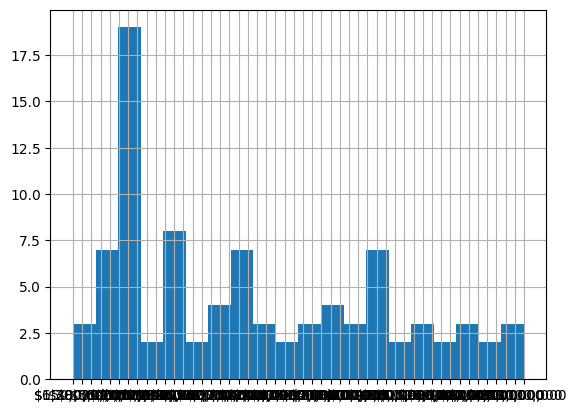

In [8]:
# Check the summary statistics of the funding amounts
print(data['Amount($)'].describe())

# Plot a histogram of funding amounts 
data['Amount($)'].hist(bins=20)

# This will help us understand the typical range of funding amounts, 
#identify any outliers, and visualize the distribution.

In [9]:
# Count the number of startups in each location to get insights into the startup hubs 
# or cities that attract the most startups.
location_counts = data['HeadQuarter'].value_counts()
print(location_counts)

HeadQuarter
Bangalore        21
Mumbai           12
Delhi            10
Noida             5
Gurugram          5
Chennai           4
Pune              2
Jaipur            2
Telangana         1
Ahmedabad         1
Haryana           1
Chandigarh        1
New Delhi         1
Surat             1
Uttar pradesh     1
Hyderabad         1
Rajasthan         1
Name: count, dtype: int64


#### Correlation Analysis

In [10]:
# Check for missing values in the 'Amount($)' column
print(data['Amount($)'].isnull().sum())

# If there are missing values, we can either remove those rows or impute them with a suitable value
# Example: Remove rows with missing values
data = data.dropna(subset=['Amount($)'])

0


In [11]:
import numpy as np
import pandas as pd

# Replace non-numeric values with NaN
data['Amount($)'] = data['Amount($)'].replace(['Undisclosed', 'Bombay Shaving'], np.nan, regex=True)

# Convert the 'Amount($)' column to a string data type
data['Amount($)'] = data['Amount($)'].astype(str)

# Remove the dollar sign and commas from the 'Amount($)' column
data['Amount($)'] = data['Amount($)'].str.replace('$', '').str.replace(',', '')

# Replace any remaining non-numeric values with NaN
data['Amount($)'] = data['Amount($)'].replace(r'[^0-9\.]', np.nan, regex=True)


In [12]:
# Replace 'Bombay Shaving' with 0 in the Amounts column
data["Amount($)"] = data["Amount($)"].replace("Bombay Shaving", 0)

In [13]:
# Convert the 'Amount($)' column to a numeric data type
data['Amount($)'] = pd.to_numeric(data['Amount($)'], errors='coerce')

### Verify Data Quality

In [19]:
# Check for missing values
print(data.isnull().sum())

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64


In [20]:
# Check for duplicate records
print(data.duplicated().sum())

0


In [21]:
# Check the data types of the features
print(data.dtypes)

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
dtype: object


In [22]:
# Check for outliers in the funding amount
print(data['Amount($)'].describe())

count              89
unique             50
top       Undisclosed
freq               12
Name: Amount($), dtype: object


In [23]:
# Check for inconsistencies or errors
# Example: Check if the founded year is valid
data['Founded'] = pd.to_numeric(data['Founded'], errors='coerce')
print(data[data['Founded'] < 1900])

Empty DataFrame
Columns: [Company/Brand, Founded, HeadQuarter, Sector, What it does, Founders, Investor, Amount($), Stage]
Index: []


### Data Exploration

Top 5 Sectors by Number of Startups:
Sector
Edtech        7
Fintech       5
AgriTech      4
Technology    4
SaaS          4
Name: count, dtype: int64


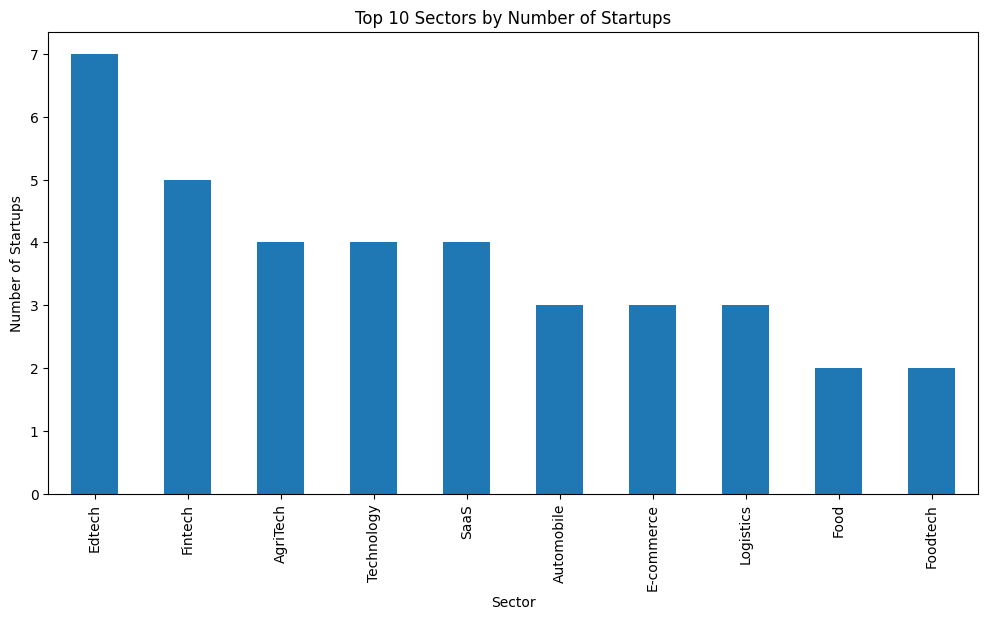

In [36]:
import matplotlib.pyplot as plt
# Count the number of startups in each sector
sector_counts = data['Sector'].value_counts()

# Print the top 5 sectors
print("Top 5 Sectors by Number of Startups:")
print(sector_counts.head(5))

# Visualize the sector distribution
sector_counts.head(10).plot(kind='bar', figsize=(12, 6))
plt.xlabel('Sector')
plt.ylabel('Number of Startups')
plt.title('Top 10 Sectors by Number of Startups')
plt.show()

count    7.700000e+01
mean     4.333030e+07
std      1.106216e+08
min      1.000000e+05
25%      2.100000e+06
50%      6.000000e+06
75%      3.000000e+07
max      6.930000e+08
Name: Amount($), dtype: float64


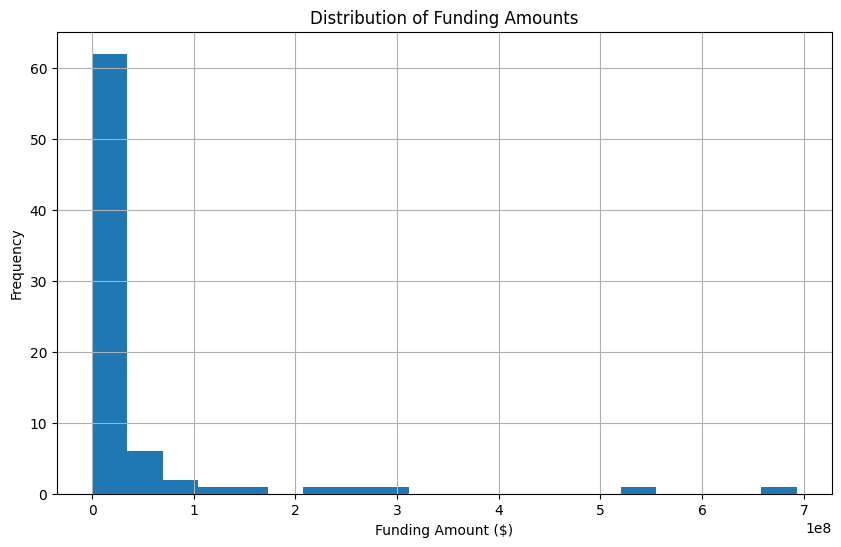

In [37]:
# Check the summary statistics of the funding amounts - distribution of funding amounts across startups
print(data['Amount($)'].describe())

# Plot a histogram of funding amounts
data['Amount($)'].hist(bins=20, figsize=(10, 6))
plt.xlabel('Funding Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Funding Amounts')
plt.show()

In [44]:
# Calculate the age of the startup (assuming the current year is 2024)
data['Age'] = 2024 - data['Founded'].fillna(2024)

# Calculate the correlation between age and funding amount
age_funding_corr = data['Age'].corr(data['Amount($)'])
print(f"Correlation between Startup Age and Funding Amount: {age_funding_corr}")

Correlation between Startup Age and Funding Amount: 0.3092155235536324


#### Which locations (headquarters) attract the most startups and funding?

In [45]:
# Count the number of startups in each location
location_counts = data['HeadQuarter'].value_counts()

# Calculate the total funding amount for each location
location_funding = data.groupby('HeadQuarter')['Amount($)'].sum().reset_index()

# Print the top 5 locations by number of startups and total funding
print("Top 5 Locations by Number of Startups:")
print(location_counts.head(5))

print("\nTop 5 Locations by Total Funding Amount:")
print(location_funding.sort_values('Amount($)', ascending=False).head(5))

Top 5 Locations by Number of Startups:
HeadQuarter
Bangalore    21
Mumbai       12
Delhi        10
Noida         5
Gurugram      5
Name: count, dtype: int64

Top 5 Locations by Total Funding Amount:
  HeadQuarter    Amount($)
1   Bangalore  824900000.0
5    Gurugram  785200000.0
9      Mumbai  372500000.0
4       Delhi  350300000.0
3     Chennai   87800000.0


### Any Patterns in Funding Stages of Startups?

Distribution of Funding Stages:
Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64


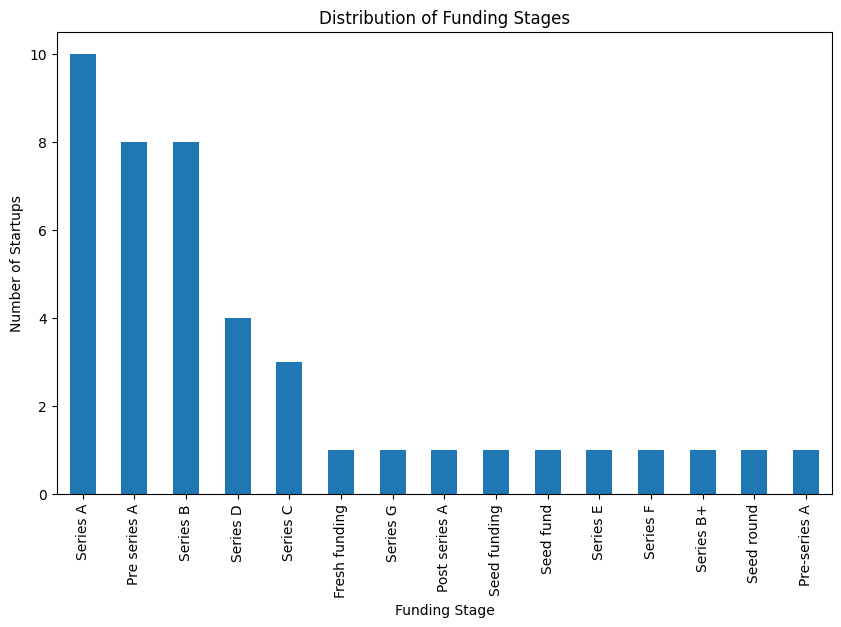

In [46]:
# Count the number of startups in each funding stage
stage_counts = data['Stage'].value_counts()

# Print the distribution of funding stages
print("Distribution of Funding Stages:")
print(stage_counts)

# Visualize the distribution
stage_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Funding Stage')
plt.ylabel('Number of Startups')
plt.title('Distribution of Funding Stages')
plt.show()

### Data Preparation

In [15]:
import numpy as np

# Clean Data
# Check for missing values in the dataset
print("Missing Values:\n", data.isnull().sum())

# Handle missing values in the 'Founded' column
data['Founded'] = data['Founded'].fillna(method='ffill')

# Remove rows with missing values in critical columns
data = data.dropna(subset=['Company/Brand', 'Sector', 'Amount($)'])

# Identify and remove duplicate rows
data = data.drop_duplicates()

# Check for inconsistent or invalid values
print("\nInvalid Values in 'Founded' Column:")
print(data[data['Founded'] < 1900])

Missing Values:
 Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)        12
Stage            46
dtype: int64

Invalid Values in 'Founded' Column:
Empty DataFrame
Columns: [Company/Brand, Founded, HeadQuarter, Sector, What it does, Founders, Investor, Amount($), Stage]
Index: []


In [17]:
# Construct Data
# Convert the 'Founded' column to a datetime object
data['Founded'] = pd.to_datetime(data['Founded'], errors='coerce')

# Calculate the age of the startup (as of 2024)
data['Age'] = 2024 - data['Founded'].dt.year

# Create a new column for the funding amount category
bins = [0, 1000000, 5000000, 10000000, 50000000, np.inf]
labels = ['<1M', '1M-5M', '5M-10M', '10M-50M', '>50M']
data['Funding_Category'] = pd.cut(data['Amount($)'], bins=bins, labels=labels, include_lowest=True)

In [18]:
# Format Data
# Convert the 'Sector' column to a categorical data type
data['Sector'] = data['Sector'].astype('category')

# One-hot encode the 'Sector' column
sector_dummies = pd.get_dummies(data['Sector'], prefix='Sector')
data = pd.concat([data, sector_dummies], axis=1)

### Univariate ANalysis

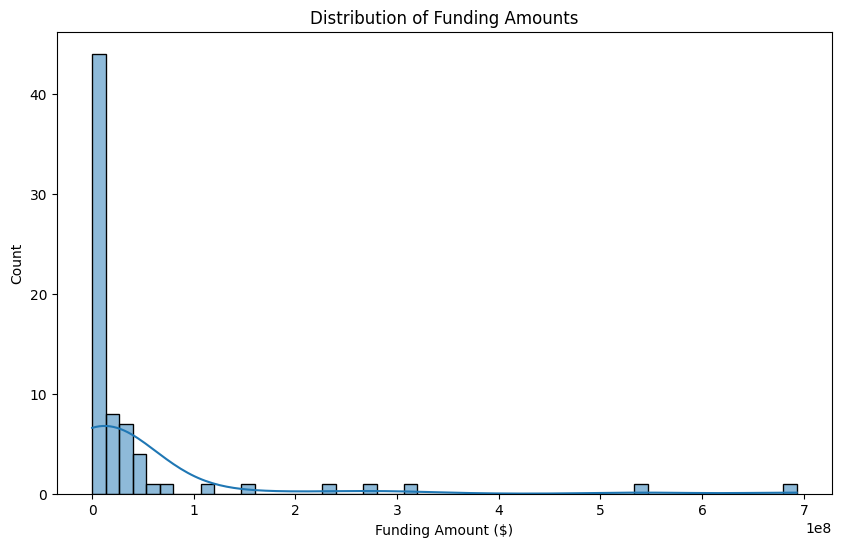

In [19]:
# Funding Amount Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of funding amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount($)'], kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount ($)')
plt.ylabel('Count')
plt.show()

# This histogram will give you an understanding of the distribution of funding amounts across 
#startups, including any potential skewness or outliers.

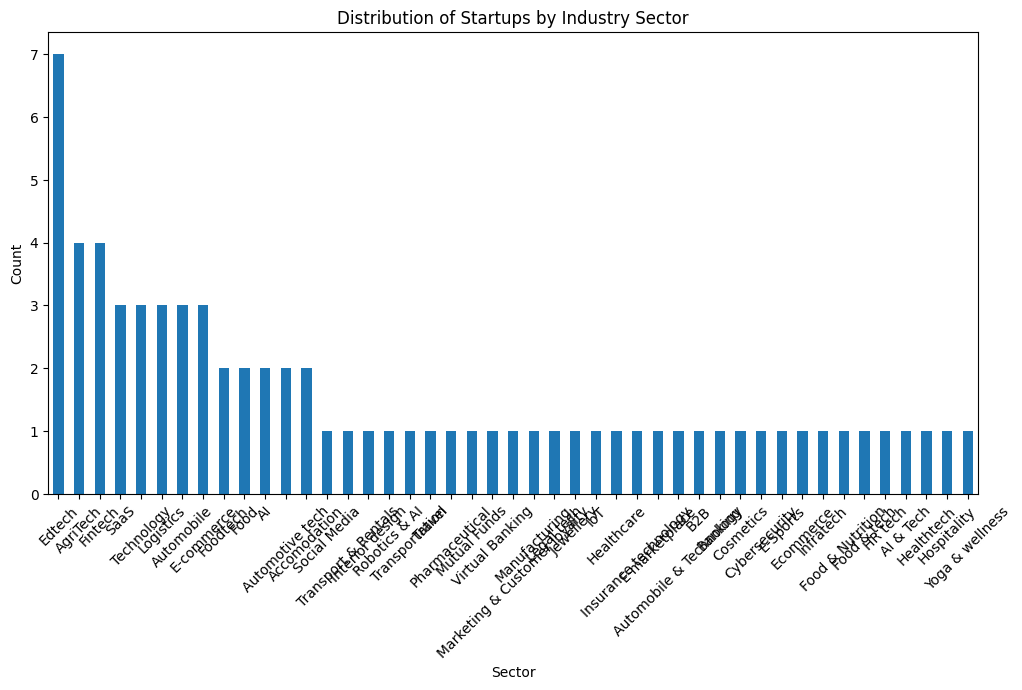

In [20]:
# Sector Distribution
# Count the number of startups in each sector
sector_counts = data['Sector'].value_counts()

# Plot a bar chart of sector distribution
plt.figure(figsize=(12, 6))
sector_counts.plot(kind='bar')
plt.title('Distribution of Startups by Industry Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis

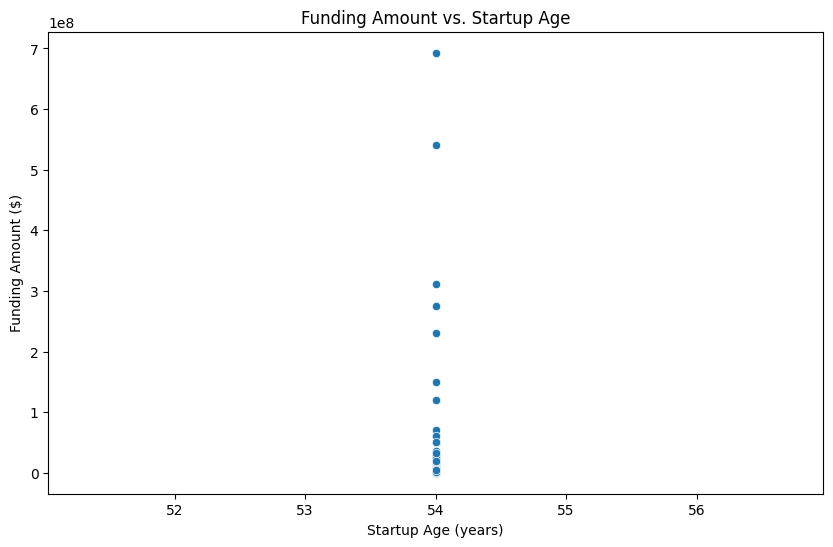

In [21]:
# Funding Amount versus Startup
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Amount($)', data=data)
plt.title('Funding Amount vs. Startup Age')
plt.xlabel('Startup Age (years)')
plt.ylabel('Funding Amount ($)')
plt.show()

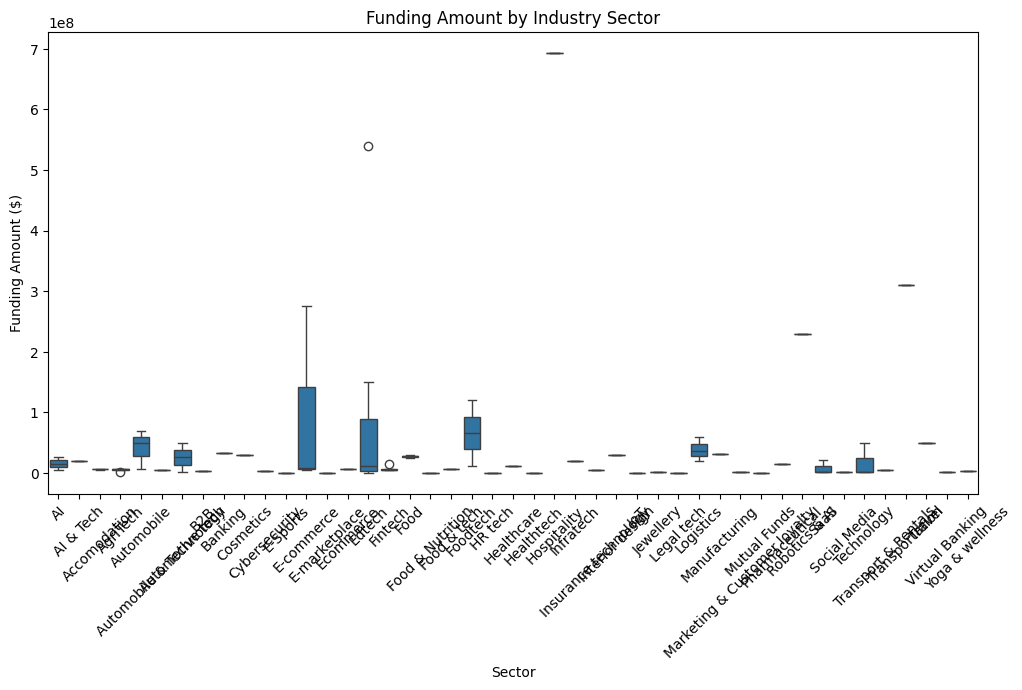

In [22]:
# Funding Amount by Sector
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='Amount($)', data=data)
plt.title('Funding Amount by Industry Sector')
plt.xlabel('Sector')
plt.ylabel('Funding Amount ($)')
plt.xticks(rotation=45)
plt.show()